KeyboardInterrupt: 

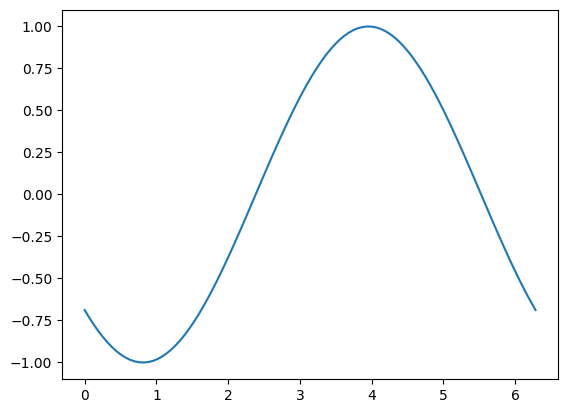

In [1]:
from matplotlib.animation import FuncAnimation, PillowWriter
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

fig, ax = plt.subplots()
line, = ax.plot(x, y)

def animate(i):
    line.set_ydata(np.sin(x + i / 10.0))
    return line,

ani = FuncAnimation(fig, animate, frames=100, interval=50, blit=True)

# 在Jupyter环境中嵌入动画
from IPython.display import HTML
HTML(ani.to_jshtml())  # 或者使用 ani.to_html5_video() 来嵌入视频


In [1]:
def get_named_beta_schedule(schedule_name, num_diffusion_timesteps):
    """
    Get a pre-defined beta schedule for the given name.

    The beta schedule library consists of beta schedules which remain similar
    in the limit of num_diffusion_timesteps.
    Beta schedules may be added, but should not be removed or changed once
    they are committed to maintain backwards compatibility.
    """
    if schedule_name == "linear":
        # Linear schedule from Ho et al, extended to work for any number of
        # diffusion steps.
        scale = 1000 / num_diffusion_timesteps
        beta_start = scale * 0.0001
        beta_end = scale * 0.02
        return np.linspace(
            beta_start, beta_end, num_diffusion_timesteps, dtype=np.float64
        )
    else:
        raise NotImplementedError(f"unknown beta schedule: {schedule_name}")


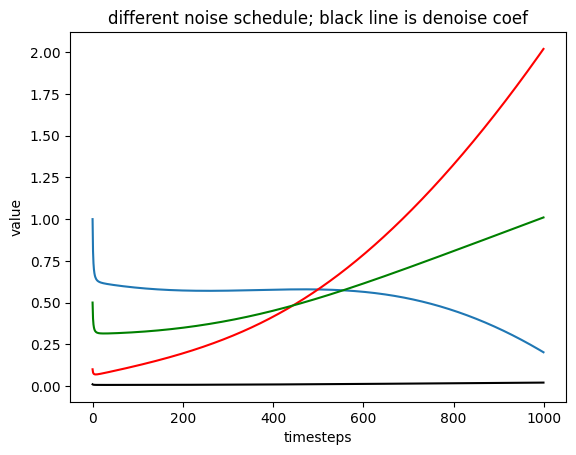

In [3]:
import numpy as np
import matplotlib.pyplot as plt

betas = get_named_beta_schedule("linear", 1000)
alphas = 1.0 - betas
sqrt_alphas = np.sqrt(alphas)
alphas_cumprod = np.cumprod(alphas, axis=0)
sqrt_one_minus_alphas_cumprod = np.sqrt(1.0 - alphas_cumprod)
tmp = betas/(sqrt_alphas * sqrt_one_minus_alphas_cumprod)
coef1 = np.linspace(100, 10, 1000)
coef2 = np.linspace(10, 100, 1000)
coef3 = np.linspace(50, 50, 1000)
fig, ax = plt.subplots()
line1, = ax.plot(coef1 * tmp)
line2, = ax.plot(coef2 * tmp, color='red')
line3, = ax.plot(coef3 * tmp, color='green')
line4, = ax.plot(tmp, color='black')
plt.title("different noise schedule; black line is denoise coef")
plt.xlabel("timesteps")
plt.ylabel("value")
fig.show()